# SL3 - Comparing classifiers - CORRECTION

In this hands-on lesson, we will compare the performance of different algorithms for classification on the Iris data set.  

This notebook is adapted from https://medium.com/@pinnzonandres/iris-classification-with-svm-on-python-c1b6e833522c 

and https://www.kaggle.com/tcvieira/simple-random-forest-iris-dataset 

![title](Figures/IrisData.png)


Iris is a genus of 260–300 species of flowering plants with showy flowers. It takes its name from the greek word for a rainbow,Iris.

In the dataset we have three types of iris:
- Iris Setosa
- Iris Versicolour
- Iris Virginica

For each flower we know (the features of our machine learning classifier):

- Sepal length
- Sepal width
- Petal length
- Petal width

The goal is to correctly classify the three types of iris using the four features

## Load and preprocessing

### Load the data and inspect them

In [1]:
#Import scikit-learn dataset library
from sklearn import datasets
#Load dataset
iris = datasets.load_iris()

In [2]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)
# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
# print the iris data (top 5 records)
print(iris.data[0:5])
# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Use pandas for better manipulation

In [4]:
import pandas as pd
# Transofm the data in a dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = pd.Series(iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# The dataframe could have been also created
# data=pd.DataFrame({
#     'sepal length':iris.data[:,0],
#     'sepal width':iris.data[:,1],
#     'petal length':iris.data[:,2],
#     'petal width':iris.data[:,3],
#     'species':iris.target
# })
# data.head()

In [6]:
# printe the size of the data
print(df['target'].value_counts())

2    50
1    50
0    50
Name: target, dtype: int64


### Some usefull visualization

Text(0.5, 1.0, 'Correlation On iris Classes')

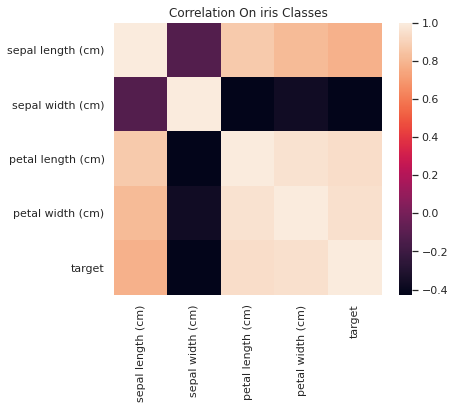

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(df.corr())
ax.set_title('Correlation On iris Classes')

We observe that:
- the shape of the petals (width and length) are the most correlated with the type of flowers 
- the sepal length wich also haves a positive but minor correlation
- we have the negative correlation of the sepal width column (and correlation is not very high)

In [20]:
import numpy as np
np.unique(df['target'].values)

array([0, 1, 2])

In [24]:
for i in enumerate(df.columns[:-1]):
    print(i)

sepal length (cm)
<class 'str'>
sepal width (cm)
<class 'str'>
petal length (cm)
<class 'str'>
petal width (cm)
<class 'str'>


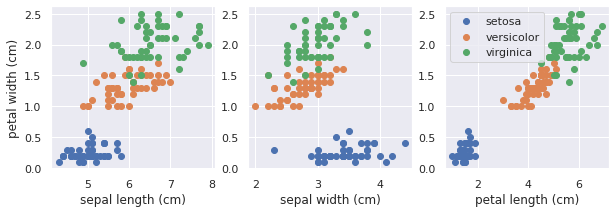

In [31]:
# Scatterplot of the features most correlated with flower type
targets = np.unique(df['target'].values)
ncols = 3 
fig, axs = plt.subplots(ncols=ncols, nrows=1, figsize=(10,3))
feature_y = df.columns[-2]
for col in range(ncols):
    feature_x = df.columns[col]
    ax = axs[col]
    for i in targets:
        mask = df['target'].values == i
        label = iris.target_names[i]

        ax.scatter(df[feature_x].values[mask], 
                   df[fetaure_y].values[mask],
                   label=label)
    if col == 0:
        ax.set_ylabel(feature_y)
    ax.set_xlabel(feature_x)
ax.legend()

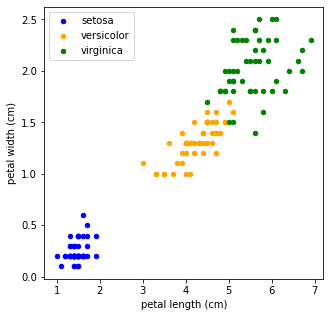

In [9]:
# Similar plot usinf the dataframe directly
colors = ['blue','orange','green']
fig, ax = plt.subplots(figsize=(5,5))
for i in range(len(iris.target_names)):
    label = iris.target_names[i]
    color = colors[i]
    df[df.target==i].plot.scatter(x='petal length (cm)', y='petal width (cm)', 
                                  label=label, color=color, ax=ax)


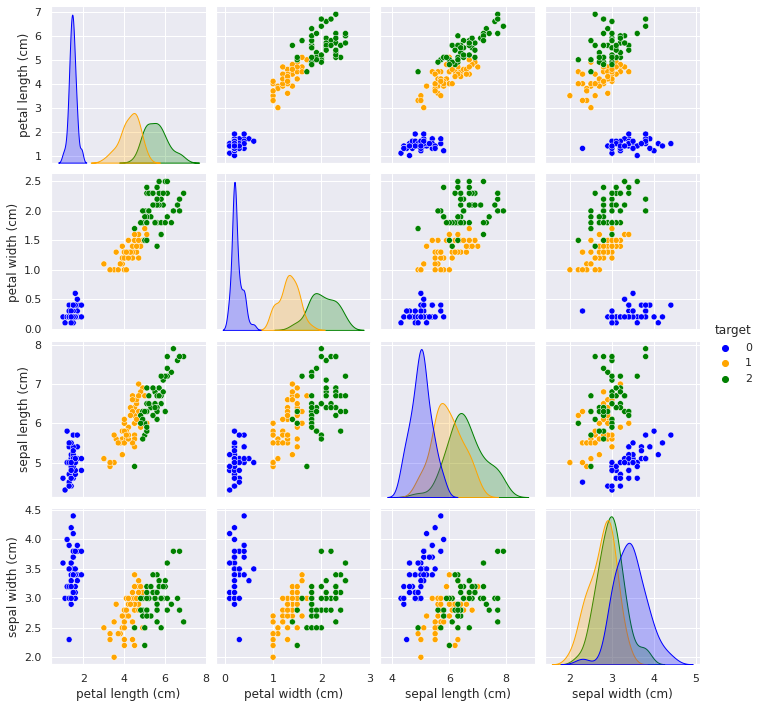

In [17]:
# Or even plotting something more insigthfull with seaborn
sns.set()
sns.pairplot(df[['petal length (cm)', 'petal width (cm)', 
                   'sepal length (cm)', 'sepal width (cm)', 'target']],
             hue="target", diag_kind="kde", 
             palette=['blue','orange','green'])


In [16]:
sns.color_palette("Paired")[:3]

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353)]

From the visual inspection it seems that the petals width and length are the two most important features to distinguish the three groups of flowers

### Prepare the data to apply machine learning classification models

In [110]:
X = df.iloc[:,:-1]  # define the features
y = df.iloc[:, -1].values  # define the target values

In [111]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(150, 4)
(150,)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [112]:
X.iloc[:5,:]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [113]:
y[:5]

array([0, 0, 0, 0, 0])

In [114]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

## Classification with Random Forest

### Train the model and compute accuracy

In [165]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier (an istance of the class)
clf=RandomForestClassifier(max_depth=i, n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


In [166]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


### Visualize the important features

In [143]:
clf.feature_importances_

array([0.0725701 , 0.02057909, 0.50056255, 0.40628825])

In [144]:
feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp


petal length (cm)    0.500563
petal width (cm)     0.406288
sepal length (cm)    0.072570
sepal width (cm)     0.020579
dtype: float64

In [145]:
feature_imp.index

Index(['petal length (cm)', 'petal width (cm)', 'sepal length (cm)',
       'sepal width (cm)'],
      dtype='object')

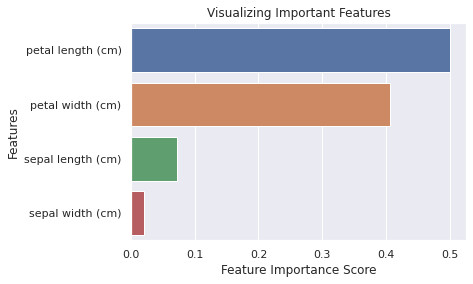

In [146]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index) 

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Classification with SVM

### Train the model and compute accuracy

In [167]:
#Create the SVM model
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
#Fit the model for the data

classifier.fit(X_train, y_train)

#Make the prediction
y_pred = classifier.predict(X_test)

In [168]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))


[[15  0  0]
 [ 0 13  1]
 [ 0  0 16]]
Accuracy: 98.00 %


In [169]:
y_test == y_pred

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [170]:
#Number of accurate predictions
sum(y_test == y_pred)
#Accuracy
print("Accuracy:",sum(y_test == y_pred)/len(y_test))

Accuracy: 0.9777777777777777


In [174]:
print("Accuracy sk learn:",metrics.accuracy_score(y_test, y_pred))

Accuracy sk learn: 0.9777777777777777


### Visualize important features

In [131]:
classifier.coef_[0]

array([-0.04617152,  0.52139203, -1.00309093, -0.46414893])

In [149]:
svc_feature_imp = pd.Series(abs(classifier.coef_[0]), index=df.columns[:-1]).sort_values(ascending=False)

<AxesSubplot:>

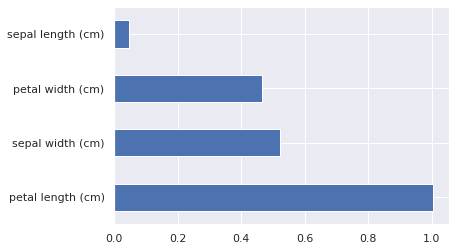

In [150]:
# Ceating a bar plot
svc_feature_imp.plot(kind='barh')

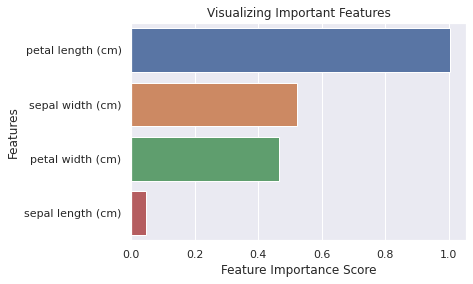

In [151]:
# Creating a better bar plot
sns.barplot(x=svc_feature_imp, y=svc_feature_imp.index) 

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()